# Progapagating uncertainty in melt inclusion vapour bubble reconstructions
- This notebook shows how to use Monte Carlo methods to propagate uncertainty in bubble density, bubble volume and melt density to calculate the uncertainty in the equivalent amount of CO2 in the bubble - e.g. how many ppm you add back into the glass
- In this instance, we get uncertainty in bubble density from repeated Raman measurements, uncertainty in melt density from the code DensityX, and estimate the uncertainty in bubble volume from optical measurements as ~50%. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The code to do the MC is in DiadFit, make sure you cite!
import DiadFit as pf
pf.__version__

'0.0.77'

## Example 1 - Run for a single samle
- This function lets you investigate for 1 MI how different values propagate to uncertainty in calculated CO2 contents


In [4]:
#  Which of your samples do you want to look at? here we look at the first one
sample_i=0
## How many duplicates do you want in the simulation?
N_dup=1000
# What is the measured vol% of your bubble
vol_perc_bub=5
# What is your estimated error on this value? Is this an absolute error, a percentage error - do you think the error is distributed normally or uniformly etc
error_vol_perc_bub=40
error_type_vol_perc_bub='Perc'
error_dist_vol_perc_bub='normal'
# What is your measured bubble density in g/cm3 by Raman or microthermometry?
CO2_bub_dens_gcm3=0.02
# What is the error on that value? Here we use the absolute error outputted by DiadFit. This is an absolute error and it should follow a normal distribution as its a 1 sigma value
error_CO2_bub_dens_gcm3=0.01
error_type_CO2_bub_dens_gcm3='Abs'
error_dist_CO2_bub_dens_gcm3='normal'
# Melt density (e.g. from DensityX)
melt_dens_kgm3=2700
# Estimated error on that - here we use 200 kg/m3, its absolute, and distributed normally
error_melt_dens_kgm3=80
error_type_melt_dens_kgm3='Abs'
error_dist_melt_dens_kgm3='normal'
## Now lets calculate the distribution
all_sims=pf.propagate_CO2_in_bubble_ind(sample_i=sample_i,  N_dup=N_dup, vol_perc_bub=vol_perc_bub,
 error_vol_perc_bub=error_vol_perc_bub, error_type_vol_perc_bub=error_type_vol_perc_bub, error_dist_vol_perc_bub=error_dist_vol_perc_bub,
CO2_bub_dens_gcm3=CO2_bub_dens_gcm3, error_CO2_bub_dens_gcm3=error_CO2_bub_dens_gcm3, error_type_CO2_bub_dens_gcm3=error_type_CO2_bub_dens_gcm3,
error_dist_CO2_bub_dens_gcm3=error_dist_CO2_bub_dens_gcm3,
melt_dens_kgm3=melt_dens_kgm3, error_melt_dens_kgm3=error_melt_dens_kgm3, error_type_melt_dens_kgm3=error_type_melt_dens_kgm3, 
error_dist_melt_dens_kgm3=error_dist_melt_dens_kgm3, len_loop=1)

In [5]:
# Lets do the basic math just to persuade ourselves this is working
vol_perc_bub=5
melt_dens_gcm3=2.7
bub_dens_gcm3=0.02
CO2_eq_bubble=10**4*(bub_dens_gcm3*vol_perc_bub/melt_dens_gcm3)
CO2_eq_bubble

370.3703703703703

In [6]:
# Now lets look at the simulation for this one sapmle. The column 'CO2_eq_melt_ppm_noMC' is the same answer as above. The column CO2_eq_melt_ppm_MC gives 1 MonteCarlo result. 
all_sims.head()

,vol_perc_bub_with_noise,CO2_eq_melt_ppm_MC,CO2_eq_melt_ppm_noMC,CO2_bub_dens_gcm3_with_noise,melt_dens_kgm3_with_noise,vol_perc_bub,Crustal Density_kg_m3,Absolute_error_Vol,error_type_vol_perc_bub,error_dist_Vol,error_CO2_bub_dens_gcm3,error_type_CO2_bub_dens_gcm3,error_dist_CO2_bub_dens_gcm3
0,1.434909,4.130598,370.37037,0.000810,2813.673035,5,0.02,2.0,Perc,normal,0.01,Abs,normal
1,5.199472,515.160428,370.37037,0.025207,2544.158215,5,0.02,2.0,Perc,normal,0.01,Abs,normal
2,6.344951,304.595983,370.37037,0.013069,2722.341448,5,0.02,2.0,Perc,normal,0.01,Abs,normal
3,2.183802,135.775689,370.37037,0.016605,2670.701888,5,0.02,2.0,Perc,normal,0.01,Abs,normal
4,7.671505,407.490531,370.37037,0.013891,2615.145324,5,0.02,2.0,Perc,normal,0.01,Abs,normal


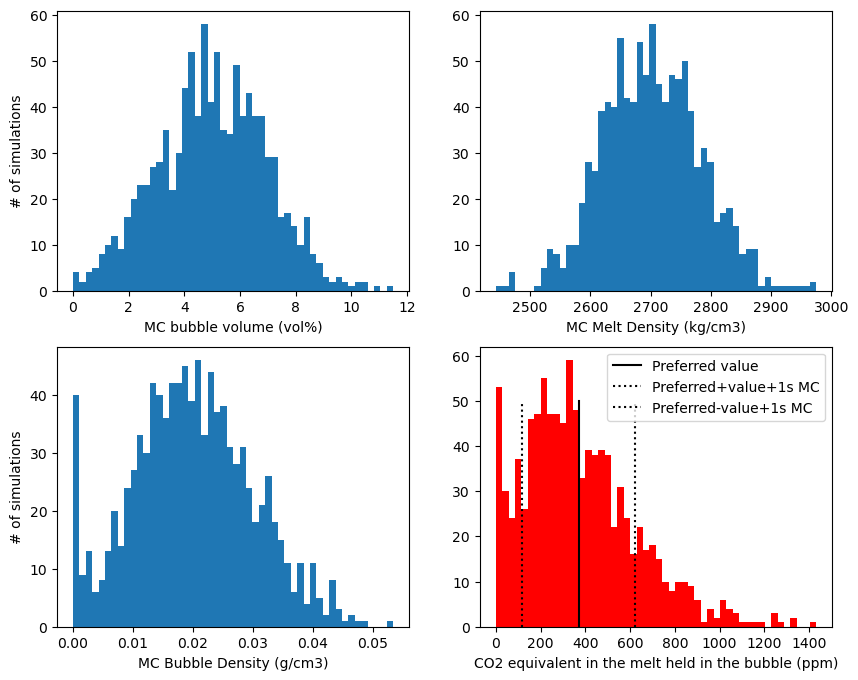

In [5]:
## Lets plot some of these outputs to check they look how we expect
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
ax1.hist(all_sims['vol_perc_bub_with_noise'], bins=50);
ax1.set_xlabel('MC bubble volume (vol%)')
ax1.set_ylabel('# of simulations')

ax2.hist(all_sims['melt_dens_kgm3_with_noise'], bins=50);
ax2.set_xlabel('MC Melt Density (kg/cm3)')

ax3.hist(all_sims['CO2_bub_dens_gcm3_with_noise'], bins=50);
ax3.set_xlabel('MC Bubble Density (g/cm3)')
ax3.set_ylabel('# of simulations')

ax4.hist(all_sims['CO2_eq_melt_ppm_MC'], bins=50, color='red');
ax4.set_xlabel('CO2 equivalent in the melt held in the bubble (ppm)')
ax4.plot([all_sims['CO2_eq_melt_ppm_noMC'].iloc[0], 	all_sims['CO2_eq_melt_ppm_noMC'].iloc[0]], [0, N_dup/20], '-k', label='Preferred value');
ax4.plot([all_sims['CO2_eq_melt_ppm_noMC'].iloc[0]+np.std(all_sims['CO2_eq_melt_ppm_MC']), 	all_sims['CO2_eq_melt_ppm_noMC'].iloc[0]+np.std(all_sims['CO2_eq_melt_ppm_MC'])], [0, N_dup/20], ':k', label='Preferred+value+1s MC');
ax4.plot([all_sims['CO2_eq_melt_ppm_noMC'].iloc[0]-np.std(all_sims['CO2_eq_melt_ppm_MC']), 	all_sims['CO2_eq_melt_ppm_noMC'].iloc[0]-np.std(all_sims['CO2_eq_melt_ppm_MC'])], [0, N_dup/20], ':k', label='Preferred-value+1s MC');
ax4.legend()


## Now lets load in some real data
- This data has the values for errors as columns for each melt inclusion (a row)
- The function outputs 2 things, av is just the mean, and std dev of the simulations. all_sims is all the simulations so you can plot them up!

In [7]:
df=pd.read_excel('Wieser_2021_Kilauea.xlsx', sheet_name='Sheet2')
df.columns

Index(['sample', 'PEC_amount', 'Na2O_PEC', 'Al2O3_PEC', 'P2O5_PEC', 'CaO_PEC',
       'K2O_PEC', 'TiO2_PEC', 'SiO2_PEC', 'MgO_PEC', 'FeOt_PEC', 'MnO_PEC',
       'H2O_Liq_meas', 'CO2_Liq_meas', 'Melt_dens', 'Melt_dens_err', 'Vol_%',
       'CO2_dens_gcm3', 'CO2_dens_gcm3_std_Dev', 'Unnamed: 19',
       'upper_1_sigma_bub', 'lower_1sigma_bub', 'best_bub', 'Unnamed: 23'],
      dtype='object')

working on sample number 0
working on sample number 20
working on sample number 40


,Filename,CO2_eq_in_melt_noMC,std_MC_CO2_equiv_melt_ppm,med_MC_CO2_equiv_melt_ppm,mean_MC_CO2_equiv_melt_ppm
0,LL8_613b,219.365581,109.267379,232.167072,228.203612
1,LL8_615,360.243929,190.879431,338.040053,349.332281
2,LL8_617_a,427.279031,208.294564,423.917946,428.227946
3,LL8_623_b,978.127362,526.323375,923.370626,961.816414
4,LL8_626,623.806538,360.581751,625.820100,652.933469


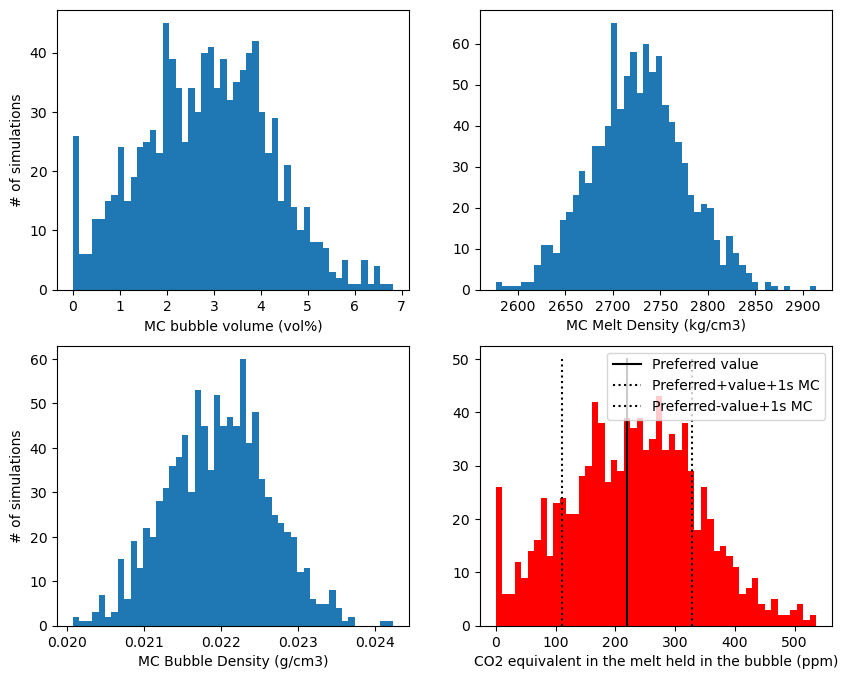

In [8]:
av, all_sims, fig=pf.propagate_CO2_in_bubble(sample_ID=df['sample'],N_dup=1000, vol_perc_bub=df['Vol_%'],
CO2_bub_dens_gcm3=df['CO2_dens_gcm3'], melt_dens_kgm3=df['Melt_dens']*1000,
error_vol_perc_bub=50, error_type_vol_perc_bub='Perc', error_dist_vol_perc_bub='normal',
error_CO2_bub_dens_gcm3=df['CO2_dens_gcm3_std_Dev'], 
error_type_CO2_bub_dens_gcm3='Abs', error_dist_CO2_bub_dens_gcm3='normal',
error_melt_dens_kgm3=50, error_type_melt_dens_kgm3='Abs', error_dist_melt_dens_kgm3='normal')
av.head()
